<a href="https://colab.research.google.com/github/Rerina/Artificial_intelligence_and_database_systems/blob/main/Hacaton.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [60]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import ast

from statsmodels.tsa.seasonal import STL
from scipy.signal import find_peaks, argrelmax, argrelmin
from scipy.spatial.distance import euclidean, correlation, cosine
from scipy.fft import fft
from scipy.stats import skew, kurtosis
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import accuracy_score, make_scorer
from sklearn.model_selection import train_test_split
from IPython.display import display

In [61]:
from google.colab import drive
drive.mount('/content/hack')

Drive already mounted at /content/hack; to attempt to forcibly remount, call drive.mount("/content/hack", force_remount=True).


In [62]:
%cd /content/hack/MyDrive/

/content/hack/MyDrive


In [63]:
import pandas as pd

In [64]:
df = pd.read_excel("/content/hack/MyDrive/Markers.xlsx")
df

,NN,время,маркер
0,1,00:02:58.075000,ds1
1,2,00:04:21.750000,ds2
2,3,00:05:42.700000,ds1
3,4,00:08:15.525000,ds2
4,5,00:24:34.675000,ds1
...,...,...,...
133,134,05:11:38.200000,is2
134,135,05:15:12.950000,ds1
135,136,05:21:56.650000,ds2
136,137,05:25:08.750000,ds1


In [65]:
import numpy as np
!pip install pyEDFlib

In [66]:
import pyedflib as plib

In [67]:
ecog = plib.EdfReader("/content/hack/MyDrive/hack/hack/ECoG_fully_marked_(4+2 files, 6 h each)/Ati4x1_15m_BL_6h.edf")
ecog

In [68]:
from pyedflib import highlevel
signals, signal_headers, header = highlevel.read_edf("/content/hack/MyDrive/hack/hack/ECoG_fully_marked_(4+2 files, 6 h each)/Ati4x1_15m_BL_6h_fully_marked.edf")
print(signals)
print(signal_headers)
print(header)

[[0.050875  0.0418125 0.0518125 ... 0.        0.        0.       ]
 [0.0465625 0.03625   0.0399375 ... 0.        0.        0.       ]
 [0.121125  0.11025   0.122875  ... 0.        0.        0.       ]]
[{'label': 'FrL', 'dimension': 'mV', 'sample_rate': 400.0, 'sample_frequency': 400.0, 'physical_max': 2.0, 'physical_min': -2.0, 'digital_max': 32000, 'digital_min': -32000, 'prefilter': '', 'transducer': ''}, {'label': 'FrR', 'dimension': 'mV', 'sample_rate': 400.0, 'sample_frequency': 400.0, 'physical_max': 2.0, 'physical_min': -2.0, 'digital_max': 32000, 'digital_min': -32000, 'prefilter': '', 'transducer': ''}, {'label': 'OcR', 'dimension': 'mV', 'sample_rate': 400.0, 'sample_frequency': 400.0, 'physical_max': 2.0, 'physical_min': -2.0, 'digital_max': 32000, 'digital_min': -32000, 'prefilter': '', 'transducer': ''}]
{'technician': '', 'recording_additional': '', 'patientname': 'X', 'patient_additional': '', 'patientcode': '', 'equipment': '', 'admincode': '', 'sex': '', 'startdate': 

In [69]:
signal_headers

[{'label': 'FrL',
  'dimension': 'mV',
  'sample_rate': 400.0,
  'sample_frequency': 400.0,
  'physical_max': 2.0,
  'physical_min': -2.0,
  'digital_max': 32000,
  'digital_min': -32000,
  'prefilter': '',
  'transducer': ''},
 {'label': 'FrR',
  'dimension': 'mV',
  'sample_rate': 400.0,
  'sample_frequency': 400.0,
  'physical_max': 2.0,
  'physical_min': -2.0,
  'digital_max': 32000,
  'digital_min': -32000,
  'prefilter': '',
  'transducer': ''},
 {'label': 'OcR',
  'dimension': 'mV',
  'sample_rate': 400.0,
  'sample_frequency': 400.0,
  'physical_max': 2.0,
  'physical_min': -2.0,
  'digital_max': 32000,
  'digital_min': -32000,
  'prefilter': '',
  'transducer': ''}]

In [70]:
import numpy as np
import matplotlib.pyplot as plt

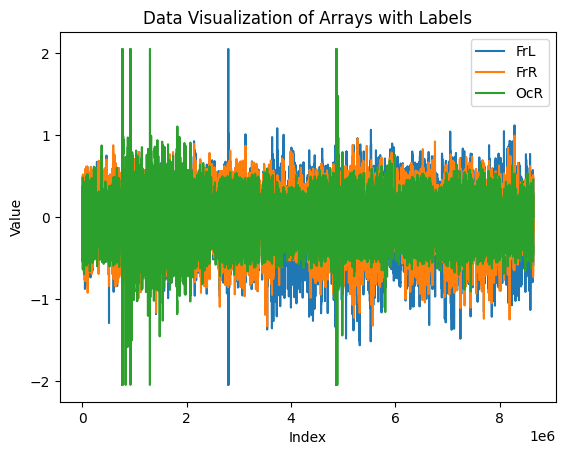

In [71]:
for i, (array, label_dict) in enumerate(zip(signals, signal_headers)):
    plt.plot(array, label=label_dict['label'])

plt.xlabel('Index')
plt.ylabel('Value')
plt.title('Data Visualization of Arrays with Labels')
plt.legend()
plt.show()

In [72]:
df = pd.read_csv("/content/hack/MyDrive/hack/hack/ECoG_fully_marked_(4+2 files, 6 h each)/Ati4x1_15m_BL_6h.txt", sep="\t", index_col="NN")
df

,время,маркер
NN,,
1,0:02:58,ds1
2,0:04:22,ds2
3,0:05:43,ds1
4,0:08:16,ds2
5,0:24:35,ds1
...,...,...
134,5:11:38,is2
135,5:15:13,ds1
136,5:21:57,ds2


In [73]:
x1 = int(header['annotations'][0][0] * 400)
x2 = int(header['annotations'][1][0] * 400)
print(x1, x2)

71200 104800


In [74]:
signals[2][71200:104800]

array([-0.0896875, -0.0385625, -0.0394375, ...,  0.0036875, -0.019875 ,
       -0.0011875])

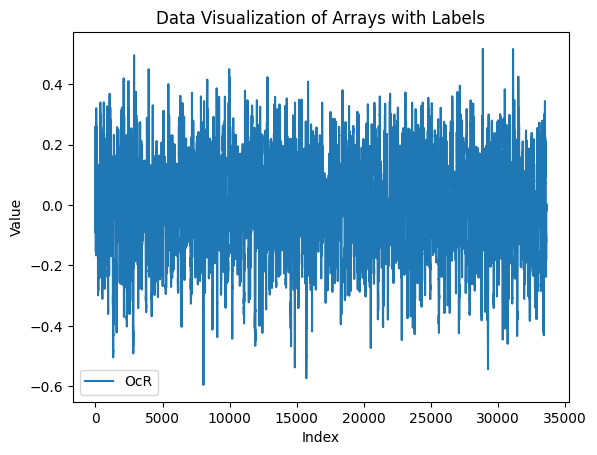

In [75]:
plt.plot(signals[2][71200:104800], label=label_dict['label'])

plt.xlabel('Index')
plt.ylabel('Value')
plt.title('Data Visualization of Arrays with Labels')
plt.legend()
plt.show()

In [77]:
x1 = int(header['annotations'][0][0] * 400)
x2 = int(header['annotations'][1][0] * 400)
print(x1, x2)

71200 104800


In [80]:
count = 0
for i in range(138):
  x1 = int(header['annotations'][i][0] * 400)
  count += 1
  x2 = int(header['annotations'][i+1][0] * 400)
  print(x1, x2, count)

71200 104800 1
104800 137200 2
137200 198400 3
198400 264000 4
264000 590000 5
590000 600400 6
600400 604400 7
604400 708800 8
708800 709600 9
709600 716400 10
716400 801200 11
801200 898400 12
898400 902000 13
902000 915200 14
915200 926800 15
926800 942400 16
942400 974800 17
974800 1007600 18
1007600 1008800 19
1008800 1012800 20
1012800 1032400 21
1032400 1054400 22
1054400 1069600 23
1069600 1087200 24
1087200 1109200 25
1109200 1119200 26
1119200 1133600 27
1133600 1149600 28
1149600 1150000 29
1150000 1608400 30
1608400 1630000 31
1630000 1639200 32
1639200 1678400 33
1678400 1683600 34
1683600 1752000 35
1752000 1812400 36
1812400 1891200 37
1891200 1939600 38
1939600 1958400 39
1958400 2246800 40
2246800 2298400 41
2298400 2311600 42
2311600 2363600 43
2363600 2371600 44
2371600 2435600 45
2435600 2435600 46
2435600 2439600 47
2439600 2632800 48
2632800 2685600 49
2685600 2699600 50
2699600 2747600 51
2747600 2754000 52
2754000 2788000 53
2788000 2806000 54
2806000 2834800 55


IndexError: list index out of range

In [78]:
# разложение Фурье

def fourier_index(x):
    N = 240
    yf = 2.0/N * np.abs(fft(x)[0 : N//2])
    indices = argrelmax(2.0 / N * np.abs(yf[0 : N//2]), order=4)

    return yf[indices]

In [ ]:
df2 =

In [ ]:
df2['fourier_1'] = df2['data'].apply(fourier_index)
df2['fourier_2'] = df2['data_2'].apply(fourier_index)

In [ ]:
df2['fourier_1'] = df2['fourier_1'].apply(lambda x: np.pad(x, (0, 17-len(x)), 'constant'))
df2['fourier_2'] = df2['fourier_2'].apply(lambda x: np.pad(x, (0, 22-len(x)), 'constant'))

In [ ]:
names1 = [f'f{i}' for i in range(17)]
names2 = [f'ff{i}' for i in range(22)]

In [ ]:
df2[names1] = pd.DataFrame(df2['fourier_1'].tolist(), index=df2.index)
df2[names2] = pd.DataFrame(df2['fourier_2'].tolist(), index=df2.index)